### Import Libraries

In [151]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [152]:
sns.set_style('darkgrid')

### Load Dataset

In [153]:
# Load csv
df = pd.read_csv("data/day.csv")

In [154]:
# Shape of dataframe
df.shape

(730, 16)

In [155]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data understanding and visualization

In [156]:
# Removing unnecessary columns
columns_to_drop = ["instant", "dteday", "casual", "registered"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


We can see no column have null value, so data seems correct here.

In [158]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [159]:
# Categorical Variable
categorical_columns = ["season", "yr", "mnth", "holiday", "workingday", "weekday", "weathersit"]

In [160]:
# Continuous Variable
continuous_columns = ["temp", "atemp", "hum", "windspeed", "cnt"]

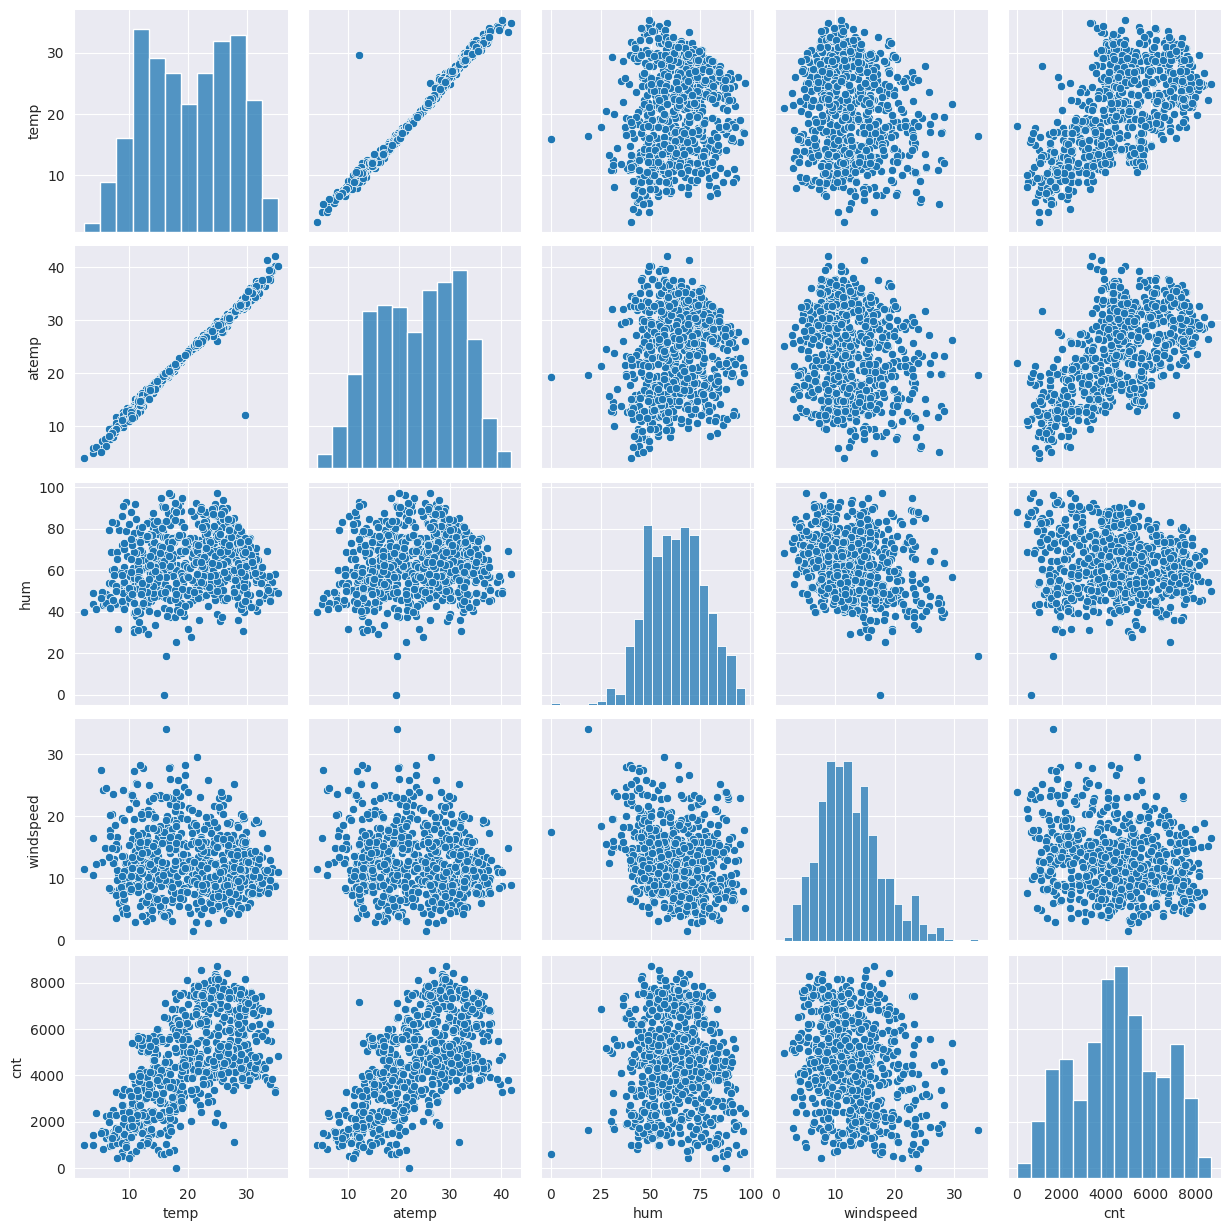

In [161]:
sns.pairplot(df[continuous_columns])
plt.show()

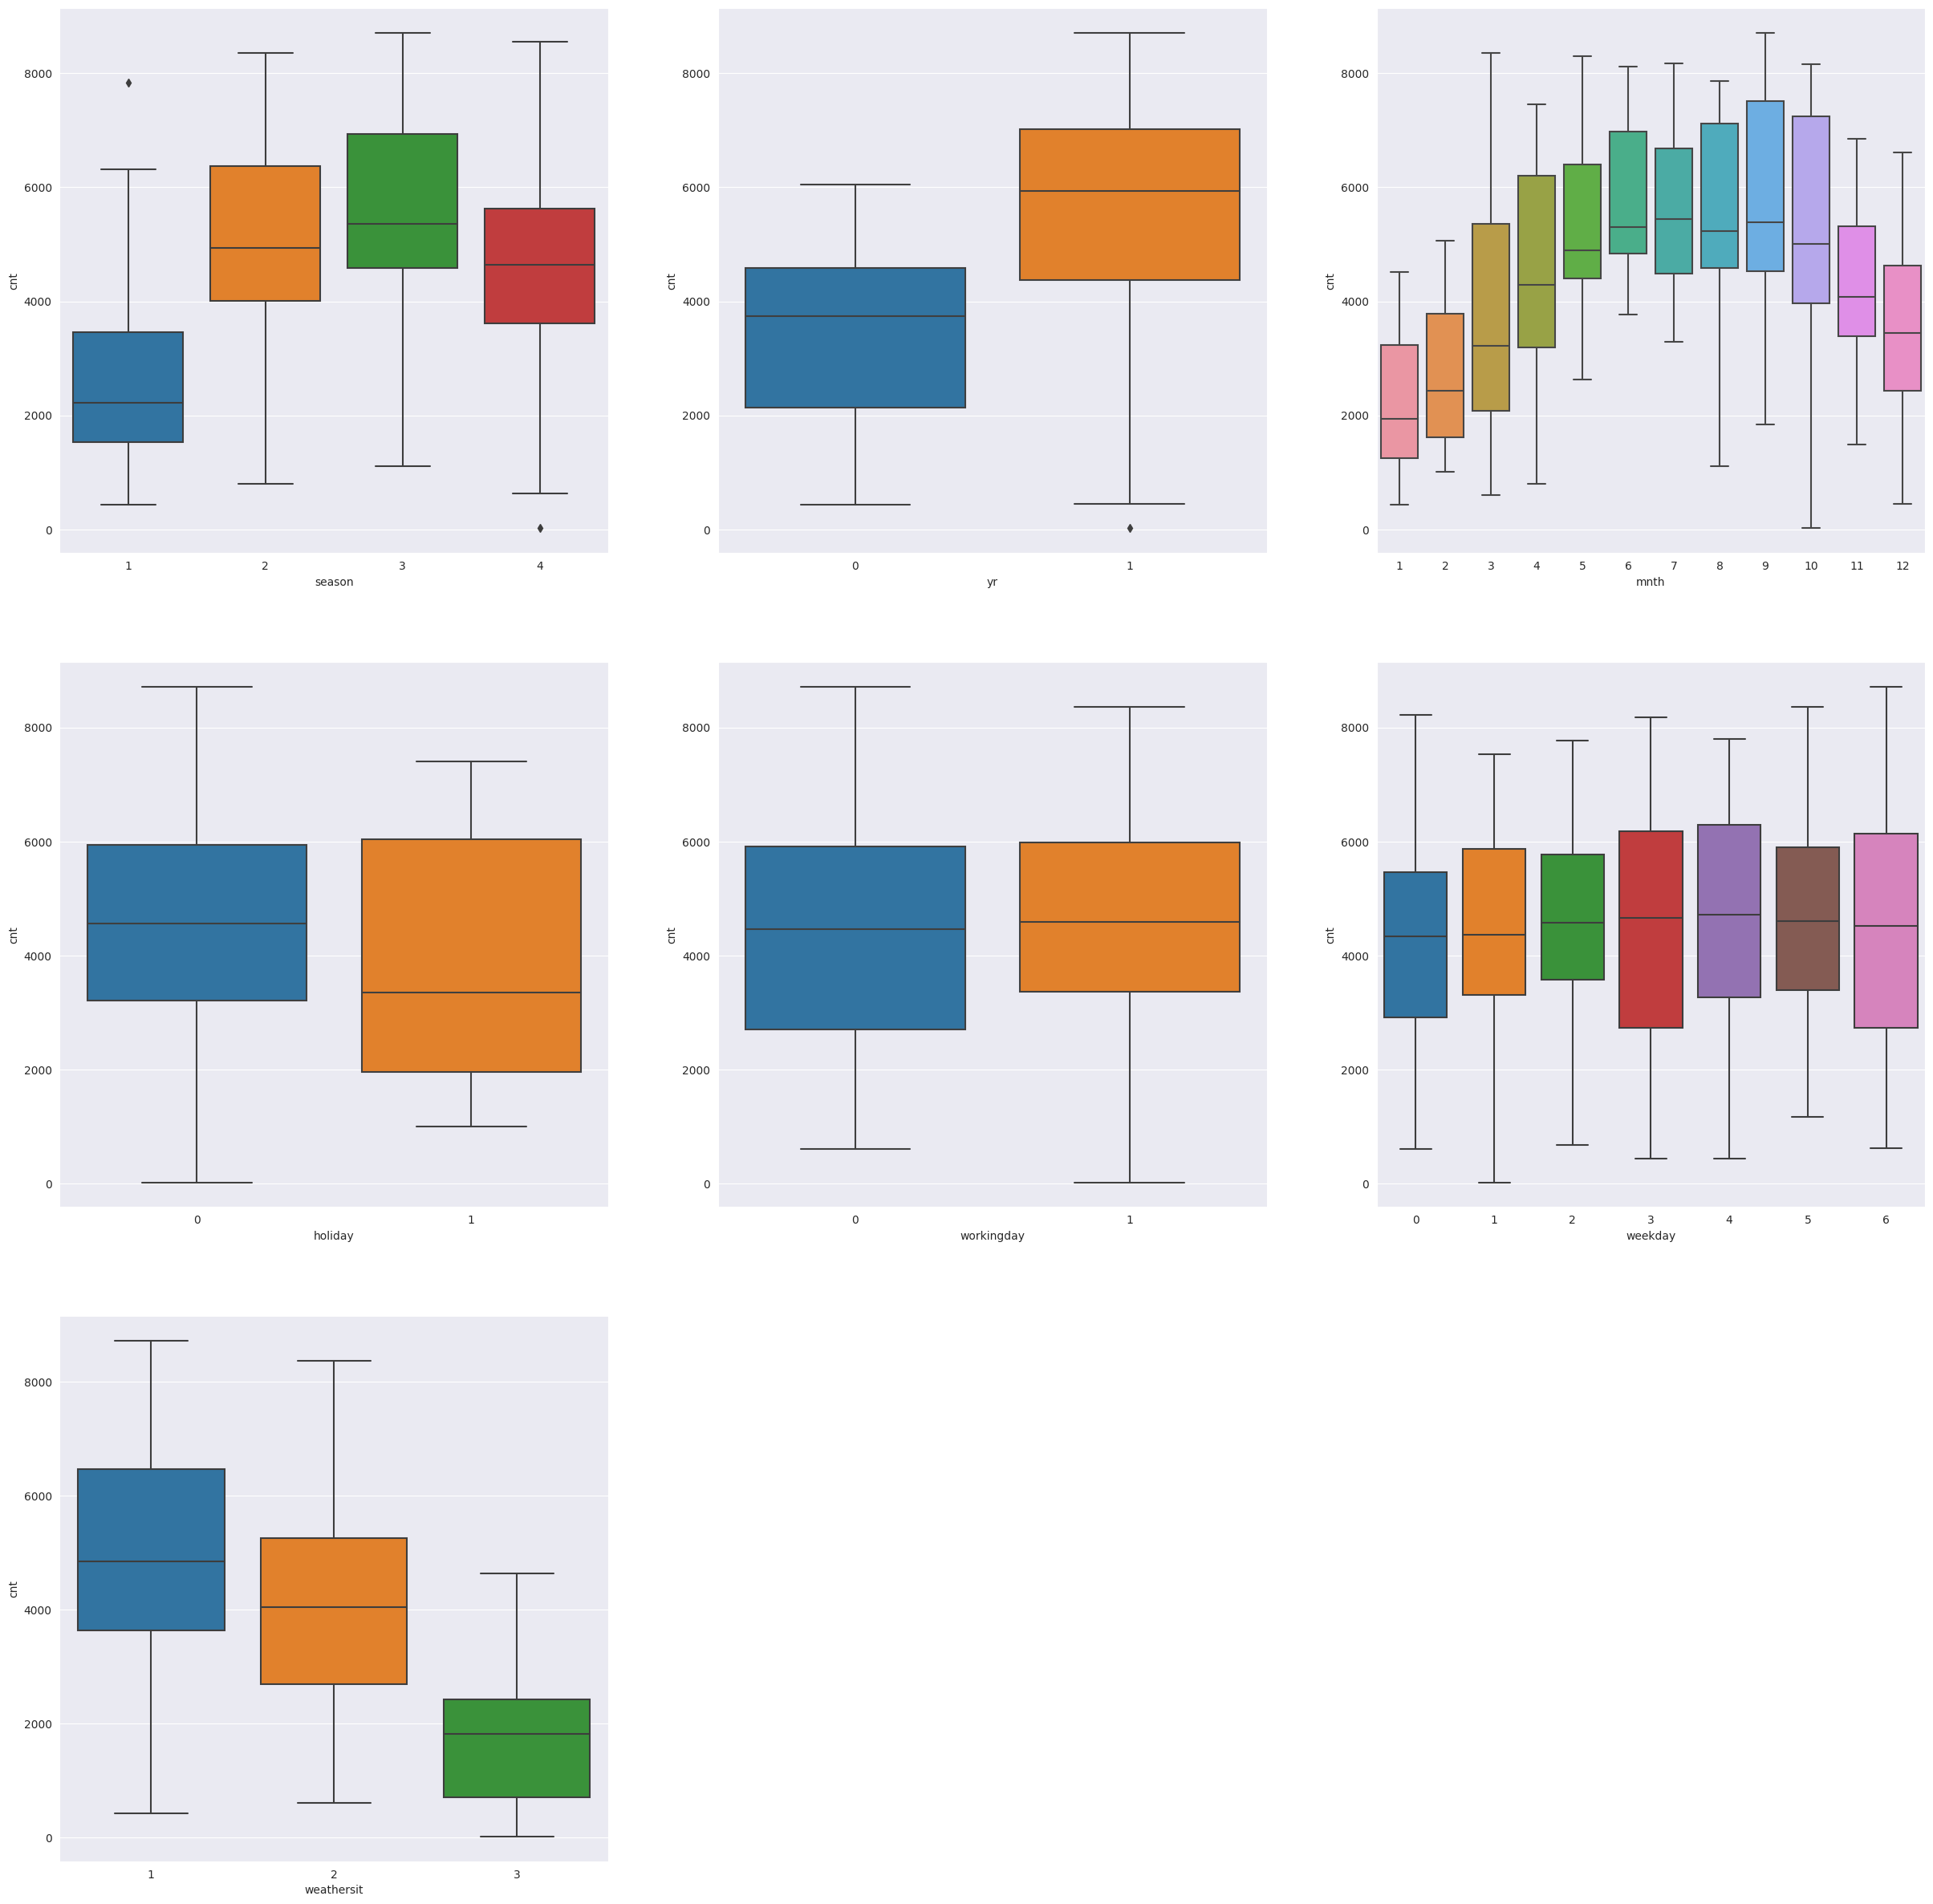

In [162]:
plt.figure(figsize=(30, 30))
for i in range(0, len(categorical_columns)): 
    plt.subplot(3,3,i+1)
    sns.boxplot(x=categorical_columns[i], y="cnt", data=df)
plt.show()

### Data Preparation

#### Split the train and test 

In [163]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(220, 12)


#### Rescaling the features - MinMax Scaling

In [164]:
# Instantiaite the object
scaler = MinMaxScaler()

In [165]:
# Fit on data - continuous_columns
df_train[continuous_columns] = scaler.fit_transform(df_train[continuous_columns])

In [166]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,0.482973
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,0.191095


#### Training the Model

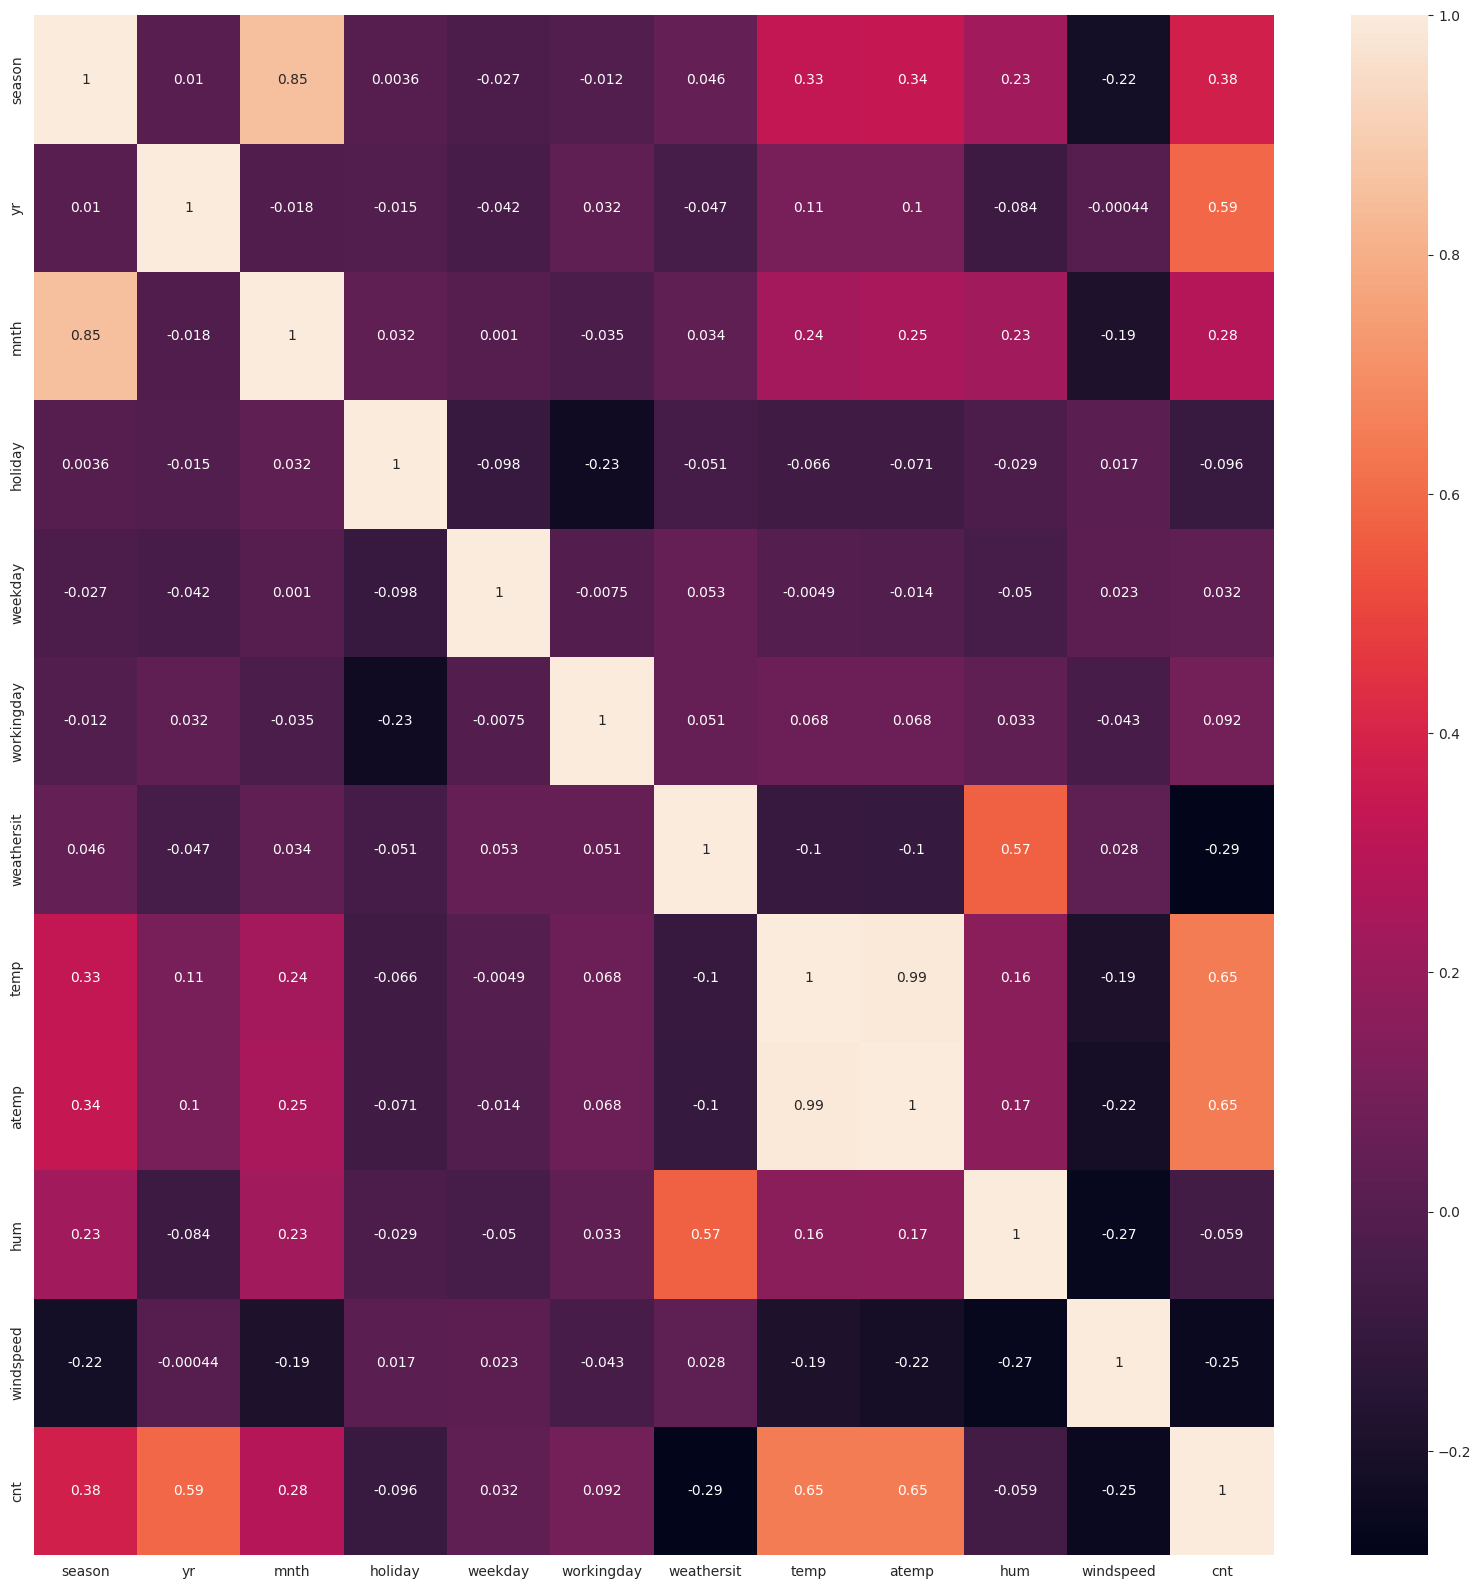

In [167]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [168]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building our model

In [169]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

###### RFE

In [170]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)
rfe = rfe.fit(X_train, y_train)

In [171]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season', False, 2),
 ('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', False, 2),
 ('weekday', False, 2),
 ('workingday', False, 2),
 ('weathersit', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [172]:
# Columns where rfe selected
selected_columns = X_train.columns[rfe.support_]

In [173]:
# Columns where rfe not selected
not_selected_columns = X_train.columns[~rfe.support_]

In [174]:
# creating X_train dataframe using RFE selected columns
X_train_rfe = X_train[selected_columns]

In [175]:
# Adding constant variable
X_train = sm.add_constant(X_train_rfe)

In [176]:
lm = sm.OLS(y_train, X_train).fit()

In [177]:
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     282.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          9.98e-144
Time:                        21:21:59   Log-Likelihood:                 379.74
No. Observations:                 510   AIC:                            -747.5
Df Residuals:                     504   BIC:                            -722.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3131      0.032      9.920      0.0

`temp` is insignificant in presence of other variable we can drop

In [178]:
X_train_new = X_train_rfe.drop(["temp"], axis=1)

Rebuilding model without `temp`

In [179]:
X_train = sm.add_constant(X_train_new)

In [180]:
lm = sm.OLS(y_train, X_train).fit()

In [181]:
# Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     352.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.11e-144
Time:                        21:21:59   Log-Likelihood:                 378.93
No. Observations:                 510   AIC:                            -747.9
Df Residuals:                     505   BIC:                            -726.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3109      0.032      9.859      0.0

In [182]:
# Calculate VIFs for new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif


,Features,VIF
2,hum,8.20
1,atemp,6.50
3,windspeed,3.39
0,yr,2.00


##### Residual Analysis

In [183]:
y_train_cnt = lm.predict(X_train)

/home/siddhant/Playground/study/AIML/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

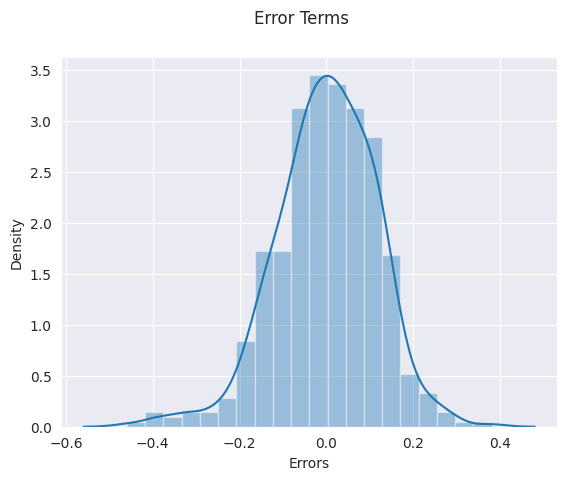

In [184]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
fig.suptitle("Error Terms")
plt.xlabel("Errors")

##### Making Predictions


In [185]:
df_test[continuous_columns] = scaler.transform(df_test[continuous_columns])

In [187]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [188]:
# Now let's use our model to make predictions.

# Creating X_test_new
X_test_new = X_test[X_train_new.columns]

X_test = sm.add_constant(X_test_new)

In [189]:
# Making predictions
y_pred = lm.predict(X_test)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

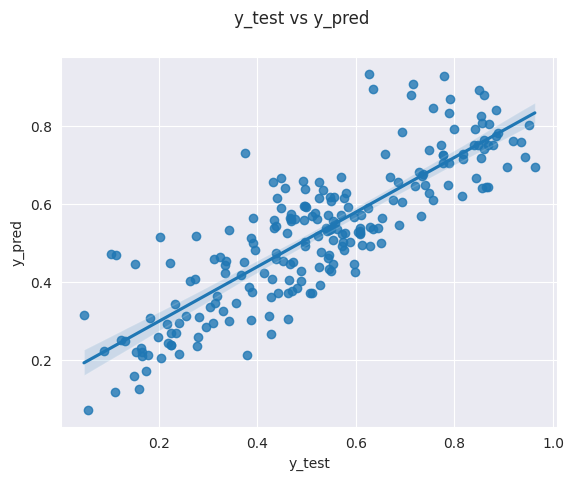

In [193]:
fig = plt.figure()
corr_plot = sns.regplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')